In [9]:
import os
import pandas as pd
from time import time

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import PCA

from constants import VARS, IDS, LOGS_DIR, DATA_DIR


In [36]:
def init_model():
    model = Sequential()
    model.add(Dense(40, input_dim=40, activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))

    tensorboard_dir = os.path.join(LOGS_DIR, "/Models/NNModel/{}".format(time))
    tensorboard = TensorBoard(log_dir=tensorboard_dir)

    model.compile(loss=root_mean_squared_error, optimizer='adam')

    return model

In [3]:
def root_mean_squared_error(y_true, y_pred):
    # Custom loss function for keras
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [30]:
df_path = os.path.join(DATA_DIR, 'season_2018_cleaned.csv')
df = pd.read_csv(df_path)
X, y = df[VARS], df['ttfl']

In [31]:
Min = MinMaxScaler()
X = Min.fit_transform(X)

In [37]:
pca_transform = PCA(n_components=40)
pca_transform_data = pca_transform.fit_transform(X)

In [38]:
model = KerasRegressor(
    build_fn=init_model,
    epochs=100,
    batch_size=8,
    validation_split=0.2,
    shuffle=True,
    verbose=1,
)

In [39]:
results = cross_val_score(model, pca_transform_data, y, cv=3)

Train on 11954 samples, validate on 2989 samples
Epoch 1/100
11954/11954 [==============================] - 5s 419us/step - loss: 11.2400 - val_loss: 10.3636
Epoch 2/100
11954/11954 [==============================] - 4s 375us/step - loss: 10.6647 - val_loss: 10.6288
Epoch 3/100
11954/11954 [==============================] - 5s 458us/step - loss: 10.5841 - val_loss: 10.2373
Epoch 4/100
11954/11954 [==============================] - 5s 386us/step - loss: 10.5314 - val_loss: 10.2031
Epoch 5/100
11954/11954 [==============================] - 4s 373us/step - loss: 10.4855 - val_loss: 10.3350
Epoch 6/100
11954/11954 [==============================] - 4s 370us/step - loss: 10.4635 - val_loss: 10.1731
Epoch 7/100
11954/11954 [==============================] - 4s 360us/step - loss: 10.3980 - val_loss: 10.0881
Epoch 8/100
11954/11954 [==============================] - 5s 394us/step - loss: 10.3432 - val_loss: 10.0714
Epoch 9/100
11954/11954 [==============================] - 4s 365us/step - loss

KeyboardInterrupt: 

In [32]:
pca = PCA().fit(X)

In [34]:
import matplotlib.pyplot as plt
import numpy as np

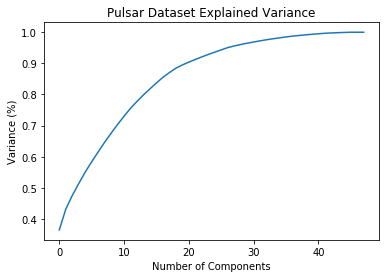

In [35]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()